<div style="font-size:22pt; line-height:25pt; font-weight:bold; text-align:center;">NEURAL NETWORK OPTIMISATION: ADAM & MORE



Author: Raphael Mikati, MSc General Engineering - ISAE Supaero (France) & MSc Management and Strategy - London School of Economics

# Contents
Introduction 

1. [Pre-requisite & preliminary elements](#sec1)
    1. [Why do you need optimisation algorithms in neural networks?](#sec1-1)
    2. [Gradient descent, learning rate, Adagrad and RMSProp](#sec1-2)
    3. [What is a "moment"?](#sec1-3)
2. [How does ADAM work?](#sec2)
    1. [Motivation & idea](#sec2-1)
    2. [The ADAM procedure](#sec2-2)
    3. [Description of the algorithm](#sec2-3)
3. [Python implementation & simulations](#sec3)
4. [Advantages & convergence issues](#sec4)
    1. [General remarks about ADAM's strenghts and weaknesses](#sec4-1)
    2. [On ADAM's convergence issues](#sec4-2)
5. [A few words on ADAMAX](#sec5)


Conclusion

References

## INTRODUCTION 

ADAM is an optimisation algorithm specifically tailored for training deep neural networks. It was first published in 2014 (Kingma and Lei Ba (2014)) and presented at the ICLR 2015 conference for deep learning practitioners. Numerous are the optimisation algorithms that work well in few problems but fail to generalise properly to the wide range of neural networks you might want to train. Indeed, the choice of the optimisation algorithm for your deep learning model can mean the difference between good results in minutes, hours, and days. 

The name ADAM is derived from "Adaptive Moment Estimation". We'll see later on how the mathematical concept of moment comes into play.







## <a id="sec1"></a> 1. PREREQUISITES & PRELIMINARY ELEMENTS

Before we start off, let us make a quick recap of some useful and essential elements to understand the ADAM algorithm.

### <a id="sec1-1"></a> 1.1. Why do you need optimisation algorithms in neural networks? 
Remember that when building neural networks, we need to minimise a certain loss function so as to learn the weights of our network. The algorithms that are most used for this purpose are part of the gradient descent family.

### <a id="sec1-2"></a>1.2. Gradient descent optimisation, learning rates and RMSProp, AdaGrad

The gradient descent family is one of the most popular categories of algorithms to perform optimisation tasks and by far the most common one in deep learning.

In a nutshell, gradient descent algorithms allow you to minimise an objective function $J(\theta)$, parametrised by a vector of parameters $\theta \in \mathbf{R}^d$. It updates the parameter in the opposite direction of the gradient of the objective function $\nabla_\theta J(\theta)$ with respect to the parameters.

The **learning rate**, $\alpha$, determines the size of the steps taken to reach a (local) minimum.

There are three variants of gradient descent which differ in the number of data points used to calculate the $\nabla_\theta J(\theta)$:

- **Batch gradient descent:** it calculates $\nabla_\theta J(\theta)$ for the entire training set:

$$\theta = \theta - \alpha \nabla_\theta J(\theta) $$


- **Stochastic gradient descent (SGD):** it performs a parameter update for each training example $x_i$ and label $y_i$:

$$\theta = \theta - \alpha \nabla_\theta J(\theta; x_i; y_i) $$


- **Mini-batch gradient descent:** it is a combination of the batch gradient descent and SGD since it performs an update for every mini-batch of n training data:

$$\theta = \theta - \alpha \nabla_\theta J(\theta; x_{(i:i+n)}; y_{(i:i+n)}) $$


Now, we need to have a basic understanding of two gradient descent algorithms: Adagrad and RMSProp. 

- **Adagrad:** Adagrad is an algorithm for gradient-based optimization that adapts the learning rate to the parameters, performing smaller updates (i.e. low learning rates) for parameters associated with frequently occurring features, and larger updates (i.e. high learning rates) for parameters associated with infrequent features. For this reason, it is well-suited for dealing with sparse data.


- **RMSProp (Root Mean Square Propagation):** it was developed by Hinton and Tieleman (2012) and addresses the need to resolve Adagrad's radically diminishing learning rates. So as to understand this need, let us take an example in which we would like to optimise a cost function which has contours like below. The red dot denotes the position of the local minimum.

<img src="rms1.png" width="800px"></img>

We start our gradient descent from point ‘A’ and after one iteration we may end up at point ‘B’, the other side of the ellipse. Then another step of gradient descent may end up at point ‘C’. With each iteration of gradient descent, we move towards the local optima with up and down oscillations. If we use larger learning rate then the vertical oscillation will have higher magnitude. So, this vertical oscillation slows down our gradient descent and prevents us from using a much larger learning rate.

<img src="rms2.png" width="800px"></img>

Thus, we want to slow down the learning rate in the vertical direction and speed up (or at least not slow it down) in the horizontal direction. This is what the RMSProp procedure does. 

We'll dive into the mathematical formulation of the Adagrad and RMSProp procedures later on.

### <a id="sec1-3"></a> 1.3. What is a "moment"?
Mathematically, the n-th moment $m_n$ of a random variable X is defined as the expected value of that variable to the power of n:

$$m_n = \displaystyle \mathbb{E}[X^n]$$

We can now understand that the expectation of a given random variable represents its first moment. If we consider the random variables X and Z defined as follows:
$$Z = X - \mathbb{E}[X]$$
We can see that the second moment of Z is the variance of X. 

## <a id="sec2"></a> 2. HOW DOES ADAM WORK?
### <a id="sec2-1"></a> 2.1. Motivation & idea
ADAM is an optimisation algorithm that can be used instead of the classical stochastic gradient descent (SGD) procedure to update the network weights in a given neural network. In concrete terms, it optimises stochastic objective functions. The classical SGD maintains a constant learning rate for all weight updates and the learning rate does not change during training. ADAM proposes to combine the advantages of Adagrad which works well with sparse gradients and RMSProp which maintains per-parameter learning rates that are adapted based on the average of recent magnitudes of the gradients for the weight (e.g. how quickly it is changing). This means the algorithm does well on online and non-stationary problems (e.g. noisy).

**But what could a stochastic objective function be?** Stochastic function can be a functions composed of a sum of subfunctions evaluated at different subsamples of data or more generally noisy functions.


### <a id="sec2-2"></a> 2.2. The ADAM procedure
Let us dive into the details of the ADAM algorithm.

Let $f(\theta)$ be a stochastic objective function. We assumed that it is differentiable with respect to its parameters $\theta$. Let $g_{t,i} = \nabla_\theta f_{t}(\theta_{t,i})$ denote the gradient of our objective function (i.e. the vector of partial derivatives of $f_t$ with respect to $\theta_i$ evaluated at timestep t). We wish to minimise the expected value of the function f: $\mathbb{E}[f(\theta)]$ (which the first moment of the random variable or stochastic function f).


First of all, we need to exhibit the parameters update rule of Adagrad and RMSProp. As we have previsouly seen, in a gradient descent scheme, parameters get updated.

- **Adagrad's update rule:**

$$\theta_{t+1,i} = \theta_{t,i} - \frac{\alpha}{\sqrt{G_{t,ii} + \epsilon}} g_{t,i} $$

where $G_t \in \mathbf{R}^{dxd}$ is a diagonal matrix where each diagonal element is the sum of the squares of the gradients with respect to $\theta_i$ up to time step t, while $\epsilon$ is a smoothing term that avoids division by zero.



- **RMSProp's update rule:**

$$\theta_{t+1} = \theta_{t} - \frac{\alpha}{\sqrt{\mathbb{E}[g^{2}_{t}] + \epsilon}} g_{t} $$

with $\mathbb{E}[g^{2}_{t}] = \gamma \mathbb{E}[g^{2}_{t-1}] + (1 - \gamma)g_t$ (usually $\gamma = 0.9$)

$g_{t}$ is equal to $\nabla \theta f_{t}(\theta_{t})$ and $\mathbb{E}[g^{2}_{t}]$ is the second moment of the random variable g at timestep t. (g can be considered a random variable since it is the gradient of f, a stochastic function).



- **ADAM's update rule:** 

Let us build the ADAM's update rule step by step. The idea of the procedure is to update the parameter $\theta$ using the squared gradients ($g_{t}^{2}$ through $v_t$) to scale the learning rate ($\alpha$) like RMSProp and making use of the exponential moving average of the gradient ($m_t$) instead of the gradient itself like Adagrad for instance. Some constants $\beta_1$ and $\beta_2$ are hyper-parameters used to control the exponential decay rates of $m_t$ and $v_t$. 

$$m_t = (1-\beta_1) \sum\limits_{i=1}^t \beta_{1}^{t-i} g_i$$
$$v_t = (1-\beta_2) \sum\limits_{i=1}^t \beta_{2}^{t-i} g_{i}^{2}$$

The algorithm updates $m_t$ and $v_t$ as it goes along using the following relations:
$$m_{t+1} = \beta_{1} m_{t} + (1 - \beta_{1})g_t $$
$$v_{t+1} = \beta_{2} v_{t} + (1 - \beta_{2})g^{2}_t $$

So far, so good, isn't it? Well almost, there is a slight issue: $m_t$ and $v_t$ are estimators respectively of the gradient and the squared gradient. In the ADAM algorithm, we need to initialise their values. And as we do so by initialising these moving averages with zeros, this gives us biased estimators. Even so, we still want to manipulate unbiased estimators i.e. we wish the following properties to hold true:
$$ \mathbb{E}[m_{t}] = \mathbb{E}[g_{t}]$$
$$ \mathbb{E}[v_{t}] = \mathbb{E}[g^{2}_{t}]$$
As we can see, the notion of "moments" comes into play (hence ADAM: Adaptive Moment Estimation)

This is thus why, we need to correct the estimators $m_t$ and $v_t$ (bias corrections) to get $\hat{m}_t$ and $\hat{v}_t$, respectively the unbiased estimators of the gradient and the squared gradient ($\beta_{i}^{t}$ denotes $\beta_i$ to the power t).

$$\hat{m}_t = \frac{m_t}{1-\beta^{t}_1} $$
$$\hat{v}_t = \frac{v_t}{1-\beta^{t}_2} $$

Thus, an initialisation of moving averages with zeros is compatible with getting unbiased estimators thanks to this bias correction trick. This proves very convenient in the algorithm.

We can now exhibit the ADAM's update rule for the parameters:

$$\boxed{\theta_{t+1} = \theta_{t} - \frac{\alpha}{\sqrt{\hat{v}_{t}} + \epsilon} \hat{m}_{t}} $$





### <a id="sec2-3"></a> 2.3. Description of the algorithm

<img src="adam.png" width="800px"></img>

Kingma and Lei Ba (2014), the inventors of ADAM recommends to use the value 0.001 for $\alpha$, 0.9 for $\beta_1$, 0.999 for $\beta_2$ and $10^{-8}$ for $\epsilon$.

## <a id="sec3"></a> 3. PYTHON IMPLEMENTATION & SIMULATIONS

We propose a Python implementation of the algorithm. 


In [2]:
import math
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [67]:
# Hyperparameters' settings
alpha = 0.001
beta_1 = 0.9
beta_2 = 0.999
epsilon = 1e-8

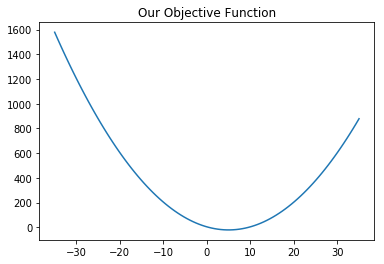

In [42]:
# The objective function
def objective_function (x):
    return(x*x - 10*x + 4)

# The gradient of the objective function under study
def gradient_obj_func (x):
    return(2*x - 10)

# Let us plot the objective function
x = np.linspace(-35,35,100)
y = objective_function(x)
plt.figure()
plt.plot(x,y)
plt.title('Our Objective Function')
plt.show()

The global minimum of this objective function is located at (x = 5, y = -21).

Now, it's your turn: could you try to code a function implementing the ADAM algorithm. Give it a go! :)

In [47]:
# The ADAM algorithm

def ADAM (grad_func, alpha, beta_1, beta_2, epsilon): # grad_func denotes the gradient of our objective function
    # Initialisation 
    theta_0 = 0
    m_t = 0
    v_t = 0
    t = 0
    theta_0_prev = -1.0 #arbitrary value just to initialise the variable
    
    # Diving into the ADAM procedure
    while (theta_0 != theta_0_prev):
        t+=1
        g_t = grad_func(theta_0) # gradient calculation
        m_t = beta_1*m_t + (1.0-beta_1)*g_t # 1st moment estimate
        v_t = beta_2*v_t + (1.0-beta_2)*(g_t*g_t) # 2nd moment estimate
        m_hat = m_t/(1.0-(beta_1**t)) # 1st moment bias correction
        v_hat = v_t/(1.0-(beta_2**t)) # 2nd moment bias correction
        theta_0_prev = theta_0
        theta_0 = theta_0 - (alpha*m_hat)/(math.sqrt(v_hat)+epsilon) # update
    return(theta_0)

In [48]:
print(ADAM (gradient_obj_func, alpha, beta_1, beta_2, epsilon))

4.999999999999979


## <a id="sec4"></a> 4. ADVANTAGES & CONVERGENCE ISSUES
### <a id="sec4-1"></a> 4.1. General remarks about ADAM's strenghts and weaknesses
When introducing the algorithm, Kingma and Lei Ba (2014) list the attractive benefits of using Adam on non-convex optimization problems:

- Straightforward to implement
- Computationally efficient
- Little memory requirements
- Invariant to diagonal rescale of the gradients
- Well suited for problems that are large in terms of data and/or parameters
- Appropriate for non-stationary objectives
- Appropriate for problems with very noisy/or sparse gradients
- Hyper-parameters have intuitive interpretation and typically require little tuning


Since the publication of Kingma and Lei Ba's paper (2014), some research has been done to assess ADAM's performance. It appears that in some areas, ADAM does not converge to an optimal solution (e.g. for image classification (CIFAR data set) or certain funtions, we'll see one of them later on) whereas SGD with momentum algorithms do (momentum is a method consisting of adding fractions of previous gradients to the current one). Furthermore, Keskar and Socher (2017) have shown that by switching to SGD during training, they have managed to get better generalisation power than when using ADAM alone. More generally, Keskar and Socher (2017) have found that in earlier stages of training ADAM outperforms SGD but later the learning saturates. They have thus proposed a fix called "SWATS" for that. It consists of starting training the neural network with ADAM and then switching to SGD after a certain threshold. 


### <a id="sec4-2"></a> 4.2. On ADAM's convergence issues
Reddi et al. (2018) have presented an example of function for which ADAM fails to converge:

$$f_{t}(x) = \begin{cases} rx, & \mbox{for } t\mbox{ mod 3 = 1} \\ -x, & \mbox{otherwise } \end{cases} $$

with $r > 2$ and $x \in [-1, 1]$

The optimum of this function is $x = - 1$, however ADAM seems unstable and converges to the value $x = 1$ for certain values of its hyper-parameters. A classical implementation of a SGD algorithm leads to an optimum of $x = -1$.

Let us see this with the following Python implementation:

In [4]:
# Gradient of our objective function
def gradient_f (x, t, r):
    if t%3 == 1:
        return (r)
    else :
        return(-1.0)

# We are interested in values lying between [-1, 1]
def projection (x):
    if -1. <= x <= 1.:
        return (x)
    elif x <= -1.:
        return (-1.0)
    else:
        return (1.0)        

# Parameters of our objective function
r = 10

Let us define a simple SGD algorithm:

In [5]:
def SGD(Niter, alpha): # alpha is the learning rate
    x = 0 # initialisation of x
    for t in range(Niter):
        g_t = gradient_f(x, t, r)
        x = projection(x-alpha*g_t)
    return(x)

Let us take $\alpha = 0.001$ and see what a SGD algorithm finds:

In [6]:
alpha = 0.001
Niter = 10000

print(SGD(Niter,alpha))

-0.998


So this implementation of the SGD algorithm converges towards the genuine minimum of our objective function. Let us see how ADAM performs if we use different hyper-parameters (different from the one tuned by Kingma and Lei Ba (2014)). We just need to tweak a little bit our ADAM algorithm coded previously to adapt to our objective function.

In [11]:
import math

def ADAM_bis (grad_func, Niter, alpha, beta_1, beta_2, epsilon): # grad_func denotes the gradient of our objective function
    # Initialisation 
    x = 0
    m_t = 0
    v_t = 0
    v_hat = 0
    t = 0
    x_prev = -10. #arbitrary value just to initialise the variable
    
    # Diving into the ADAM procedure
    for t in range(Niter):
        t+=1
        g_t = grad_func(x, t, r) # gradient calculation
        m_t = beta_1*m_t + (1.0-beta_1)*g_t # 1st moment estimate
        v_t = beta_2*v_t + (1.0-beta_2)*(g_t*g_t) # 2nd moment estimate
        m_hat = m_t/(1.0-(beta_1**t)) # 1st moment bias correction
        v_hat = v_t/(1.0-(beta_2**t)) # 2nd moment bias correction
        x_prev = x
        x = projection(x - (alpha*m_hat)/(math.sqrt(v_hat)+epsilon)) # update
    return(x)

In [12]:
# Setting up the hyperparameters
beta_1 = 0.
beta_2 = float(1/(1+r*r))
epsilon = 1e-8

# Testing ADAM on our example
print(ADAM_bis(gradient_f, Niter, alpha, beta_1, beta_2, epsilon))

0.9989950631672736


The ADAM algorithm does not converges to -1 if we decide to choose values that are different from the ones tuned by Kingam and Lei Ba (2014). It roughly gives the value 1. We can explain such an outcome by noticing that the algorithm gets the large gradient r once every three steps while for the two other steps it observes the gradient −1, which moves the algorithm in the wrong direction. The large gradient r is unable to counteract this effect since it is scaled down by a factor of almost r for the given value of $\beta_2$, and hence the algorithm converges to 1 rather than −1.





**The AMSGRAD's trick:**

To fix this convergence instability, Reddi et al. (2018) propose to tweak the bias correction for $v_t$. They suggest the following update:
$$\hat{v}_{t+1} = max (v_t, \hat{v_t}) $$

Reddi et al. (2018) takes the maximum instead of dividing $v_t$ by $1 - \beta^{t}_2$ when updating the unbiased estimator $\hat{v_t}$. The algorithm they have developed is called AMSGRAD.

Let us implement it and test it to see how it compares to ADAM with the same hyperparameters.

In [13]:
def AMSGRAD (grad_func, Niter, alpha, beta_1, beta_2, epsilon): # grad_func denotes the gradient of our objective function
    # Initialisation 
    x = 0
    m_t = 0
    v_t = 0
    v_hat = 0
    t = 0
    x_prev = -10. #arbitrary value just to initialise the variable
    
    # Diving into the ADAM procedure
    for t in range(Niter):
        t+=1
        g_t = grad_func(x, t, r) # gradient calculation
        m_t = beta_1*m_t + (1.0-beta_1)*g_t # 1st moment estimate
        v_t = beta_2*v_t + (1.0-beta_2)*(g_t*g_t) # 2nd moment estimate
        m_hat = m_t/(1.0-(beta_1**t)) # 1st moment bias correction
        v_hat = max(v_t, v_hat) # 2nd moment bias correction: THIS IS THE TRICK!!!!!
        x_prev = x
        x = projection(x - (alpha*m_hat)/(math.sqrt(v_hat)+epsilon)) # update
    return(x)

In [14]:
print(AMSGRAD(gradient_f, Niter, alpha, beta_1, beta_2, epsilon))

-1.0


Thus, AMSGRAD converges to the optimum without the need to modify the hyper-parameters!!!

## <a id="sec5"></a> 5. A FEW WORDS ON ADAMAX

ADAMAX was introduced by Kingma and Lei Ba (2014) as an extension of ADAM and looks a little bit similar to AMSGRAD.

Remember the ADAM's update rule:

$$\theta_{t+1} = \theta_{t} - \frac{\alpha}{\sqrt{\hat{v}_{t}} + \epsilon} \hat{m}_{t} $$

We can see that the gradients are scaled inversely proportionally to a $L^2$ norm of their individual current and past gradients (this is hidden in $\hat{v_t}$ and $v_t = \beta_{2} v_{t} + (1 - \beta_{2})g^{2}_t$).

So why not generalising the $L^2$ norm-based update rule to a $L^p$ one? 

At first sight, one could argue that such variants become numerically unstable for large p. However, in the special case of the infinity norm ($p\rightarrow \infty$), we get a stable algorithm.


For the sake of clarity, we denote $u_t$ the infinity norm-constrained $v_t$:

$$u_t = \beta^{\infty}_{2}u_{t-1} + (1 - \beta^{\infty}_{2})|g_{t}|^{\infty} = max(\beta_2 \cdot u_{t-1};|g_{t}|) $$


In concrete terms, what we are doing is merely replacing $\sqrt{\hat{v}_{t}} + \epsilon$ by $u_t$. We can now derive the ADAMAX's update rule:

$$\boxed{\theta_{t+1} = \theta_{t} - \frac{\alpha}{u_t} \hat{m}_{t}} $$

By tweaking ADAM, we get the ADAMAX algorithm:

<img src="adamax.png" width="800px"></img>

Kingma et Lei Ba (2014) recommend to use the following parameters:
$\alpha = 0.002$, $\beta_1 = 0.9$ and  $\beta_2 = 0.999$.

Your turn! Could you take your cue from the ADAM algorithm we coded earlier on and implement ADAMAX? Give it a try :)

In [19]:
def ADAMAX (grad_func, alpha, beta_1, beta_2): # grad_func denotes the gradient of our objective function
    # Initialisation 
    theta_0 = 0
    m_t = 0
    u_t = 0
    t = 0
    theta_0_prev = -1.0 #arbitrary value just to initialise the variable
    
    # Diving into the ADAM procedure
    while (theta_0 != theta_0_prev):
        t+=1
        g_t = grad_func(theta_0) # gradient calculation
        m_t = beta_1*m_t + (1.0-beta_1)*g_t # 1st moment estimate
        m_hat = m_t/(1.0-(beta_1**t)) # 1st moment bias correction
        u_t = max(u_t*beta_2, abs(g_t)) 
        theta_0_prev = theta_0
        theta_0 = theta_0 - (alpha*m_hat)/u_t # update
    return(theta_0)

Let us make use of the recommended parameters

In [16]:
alpha = 0.002
beta_1 = 0.9
beta_2 = 0.999

We can now test ADAMAX on a function we have already implemented: $x^{2} - 10x +4$

In [18]:
# The gradient of the objective function under study
def gradient_obj_func (x):
    return(2*x - 10)


print(ADAMAX (gradient_obj_func, alpha, beta_1, beta_2))

4.999999999999994


We can also check whether ADAMAX works on the function for which ADAM fails. We need to make some slights changes to our ADAMAX algorithm to adapt to such a function.

In [20]:
def ADAMAX_bis (grad_func, Niter, alpha, beta_1, beta_): # grad_func denotes the gradient of our objective function
    # Initialisation 
    x = 0
    m_t = 0
    u_t = 0
    t = 0
    x_prev = -10. #arbitrary value just to initialise the variable
    
    # Diving into the ADAM procedure
    for t in range(Niter):
        t+=1
        g_t = grad_func(x, t, r) # gradient calculation
        m_t = beta_1*m_t + (1.0-beta_1)*g_t # 1st moment estimate
        m_hat = m_t/(1.0-(beta_1**t)) # 1st moment bias correction
        v_hat = u_t = max(u_t*beta_2, abs(g_t))
        x_prev = x
        x = projection(x - - (alpha*m_hat)/u_t) # update
    return(x)

In [21]:
# Setting up the hyperparameters
beta_1 = 0.
beta_2 = float(1/(1+r*r))
epsilon = 1e-8

In [22]:
print(ADAMAX_bis(gradient_f, Niter, alpha, beta_1, beta_2))

-0.998


Even when we use parameters that are different from the recommended ones, ADAMAX does work whereas ADAM does not!!!

## CONCLUSION

In this notebook, we have discovered ADAM, a recent optimisation algorithm that can prove useful when training neural networks (i.e. learning the weights of the network).

The key takeaways are:

- ADAM combines the advantages of Adagrad and RMSProp, two other optimisation procedures
- ADAM is appropriate to problems with large datasets, sparse gradients and/or noisy functions.
- ADAM can be used online
- ... however if you change the recommended hyper-parameters, ADAM fails to converge for some functions. This can be fixed by tweaking the ADAM's update rule (AMSGRAD, ADAMAX) 

<div style="font-size:16pt; line-height:19pt; font-weight:bold; text-align:center;">Hope you've learnt some new stuffs! Thank you for reading :)

## REFERENCES

[Diederik P. Kingma and Jimmy Lei Ba. Adam : A method for stochastic optimization. 2014. arXiv:1412.6980v9](https://arxiv.org/abs/1412.6980)


[John Duchi, Elad Hazan, and Yoram Singer. Adaptive Subgradient Methods for Online Learning and Stochastic Optimization. Journal of Machine Learning Research, 12:2121–2159, 2011.](http://www.jmlr.org/papers/volume12/duchi11a/duchi11a.pdf)



[Tijmen Tieleman and Geoffrey Hinton. Lecture 6.5-rmsprop: Divide the gradient by a running average of its recent magnitude. COURSERA- neural networks for machine learning, 4(2), 26–31, 2012.](https://www.cs.toronto.edu/~tijmen/csc321/slides/lecture_slides_lec6.pdf)



[Nitish Shirish Keskar, Richard Socher. Improving Generalization Performance by Switching from Adam to SGD. 2017 arXiv:1712.07628v1](https://arxiv.org/abs/1712.07628)


[Sashank J. Reddi, Satyen Kale, Sanjiv Kumar. On the Convergence of Adam and Beyond. 2018.](https://openreview.net/forum?id=ryQu7f-RZ)
